<div align="center">
    <h1><strong>Análisis Modal 2D</strong></h1>
    <h2>Juan David Argüello Plata</h2>
    <img src="Images/uis.png" style="width: 300px;" />
</div>

## __1. Planteamiento del Problema__

<div align="justify">
    Se busca analizar, mediante métodos <i>analíticos</i> y <i>numéricos</i>, el comportamiento modal de la barra mostrada en la Figura 1.
</div>

<br>

<div align="center">
    <img src="Images/Esquema/Esquema.png" style="width: 500px;" />
</div>

<div align="center">
    <i>Figura 1.</i> Geometría del problema.
</div>

<div align="justify">
    Los propiedades del material se pueden especificar a continuación.
</div>

In [1]:
data = {
    'Geometría': {
        'a': {
            'Valor':10,
            'Units': 'm'
        },
        'h': {
            'Valor': 10,
            'Units': 'm'
        },
        'r': {
            'Valor': 6,
            'Units': 'm'
        }
    },
    'Propiedades': {
        'E': {
            'Valor': 200E6,
            'Units': 'MPa'
        },
        'v': {
            'Valor': 0.3,
            'Units': ''
        }
    }
}

from IPython.display import HTML, display
for c in data:
    for d in data[c]: 
        if d != 'v':
            text = '$' + d + '= ' + str(data[c][d]['Valor']) + '\left[' + data[c][d]['Units'] + '\\right]$'
        else:
            text = '$' + d + '= ' + str(data[c][d]['Valor']) + '' + data[c][d]['Units'] + '$'
        display(HTML(text))

## __2. Solución Analítica__

<div align="justify">
    El problema
</div>

## __3. Solución Numérica__

<div align="justify">
    La geomtería dada es la siguiente:
</div>

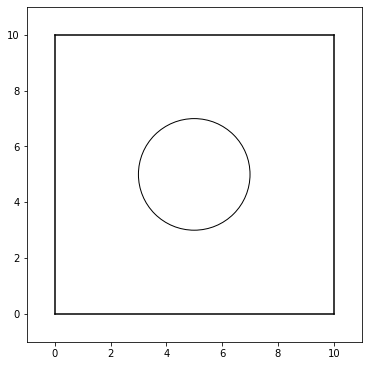

In [2]:
%matplotlib inline
from App.Preprocessing.Geometry import *
Geo(data['Geometría'], True)

<div align="justify">
    Se inicia realizando la discretización del dominio.
</div>

In [3]:
from App.Preprocessing.Mesh import Malla
from ipywidgets import *
def Mesh(xsub,ysub, ref,Eltype='Cuad4', numEl = False,
         numN = False):
    Malla((data['Geometría']['a']['Valor']/xsub,
           data['Geometría']['a']['Valor']/ysub),
           ref,
           (numEl, numN),
           data['Geometría'], Eltype)
ElData = interactive(Mesh,
                     xsub=(3,15,1),
                     ysub=(3,15,1),
                     ref=(0,5,1),
                     Eltype=['Cuad4', 'Cuad8', 'Tri3', 'Tri6'],
                     numEl = False, numN = False)
display(ElData)

interactive(children=(IntSlider(value=9, description='xsub', max=15, min=3), IntSlider(value=9, description='y…

In [ ]:
import numpy as np
z = np.zeros((4,2))
z[0][0] = 1
for i in range(1,5):
    print(i)

In [ ]:
import ipywidgets as widgets
accordion = widgets.Accordion(children=[widgets.IntSlider(), widgets.Text()])
accordion.set_title(0, 'Subdivisiones en x')
accordion.set_title(1, 'Subdivisiones en y')
tab_nest = widgets.Tab()
tab_nest.children = [accordion, accordion]
tab_nest.set_title(0, 'Subdivisiones')
tab_nest.set_title(1, 'Tipo de Elemento')
tab_nest

In [ ]:
from ipywidgets import *
import seaborn.apionly as sns
df = sns.load_dataset('iris')
import matplotlib.pyplot as plt

#plot
def plot_image(x):

    data = df

    if x != 'Select':
        xplot = data[x]
        sns.distplot(xplot)
        plt.show()

#define widgets
x = widgets.Dropdown(
        options=df.columns,
        value=df.columns[0],
        description='X'
    )

x.set_title  = 'x'

#assign widgets to tabs
tab_visualise = widgets.HBox([x])

#create tabs
tab_nest = widgets.Tab()
# tab_nest.children = [tab_visualise]
tab_nest.set_title(0, 'Visualise')


#interact function in isolation
f = interactive(plot_image, x = x);
tab_nest.children = [VBox(children = f.children)]
display(tab_nest)